In [3]:
import pandas as pd

activity_data = pd.read_csv('/kaggle/input/fitbitdata/activity_data.csv')
activity_data_heartrate = pd.read_csv('/kaggle/input/fitbitdata/activity_data_heartrate.csv')
heartrate = pd.read_csv('/kaggle/input/fitbitdata/heartrate.csv')
sleep_data = pd.read_csv('/kaggle/input/fitbitdata/sleep_data.csv')

# Convert 'Date' columns to datetime type
activity_data['Date'] = pd.to_datetime(activity_data['Date'])
activity_data_heartrate['Date'] = pd.to_datetime(activity_data_heartrate['Date'])
heartrate['Date'] = pd.to_datetime(heartrate['Date'])
sleep_data['Date'] = pd.to_datetime(sleep_data['Date'])


print("Activity Data Structure:")
print(activity_data.info())
print("\nActivity Data Heart Rate Structure:")
print(activity_data_heartrate.info())
print("\nHeart Rate Data Structure:")
print(heartrate.info())
print("\nSleep Data Structure:")
print(sleep_data.info())

# Handle missing values
activity_data.fillna(activity_data.mean(), inplace=True)
activity_data_heartrate.fillna(activity_data_heartrate.mean(), inplace=True)
heartrate.fillna(heartrate.mean(), inplace=True)
sleep_data.fillna(sleep_data.mean(), inplace=True)

Activity Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  940 non-null    int64         
 1   Date                940 non-null    datetime64[ns]
 2   TotalSteps          940 non-null    int64         
 3   TotalDistance       940 non-null    float64       
 4   SedentaryMinutes    940 non-null    int64         
 5   TotalActiveMinutes  940 non-null    int64         
 6   Calories            940 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 51.5 KB
None

Activity Data Heart Rate Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  334 non-null  

In [4]:
# Since the missing values have already been handled in the previous task, we will now summarize key statistics for each variable.

# Summarizing key statistics for Activity Data
activity_data_summary = activity_data.describe()
print("Activity Data Summary:")
print(activity_data_summary)

# Summarizing key statistics for Activity Data with Heart Rate
activity_data_heartrate_summary = activity_data_heartrate.describe()
print("\nActivity Data with Heart Rate Summary:")
print(activity_data_heartrate_summary)

# Summarizing key statistics for Heart Rate Data
heartrate_summary = heartrate.describe()
print("\nHeart Rate Data Summary:")
print(heartrate_summary)

# Summarizing key statistics for Sleep Data
sleep_data_summary = sleep_data.describe()
print("\nSleep Data Summary:")
print(sleep_data_summary)


Activity Data Summary:
                 Id                           Date    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  SedentaryMinutes  TotalActiveMinutes     Calories  
count     940.000000        940.000000          940.000000   940.000000  
mean        5.489702        991.210638          227.542553  2303.609574  
min         0.000000          0.000000            0.000000     0.000000  
25%         2.620000        729.750000          146.750000  1828.500

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


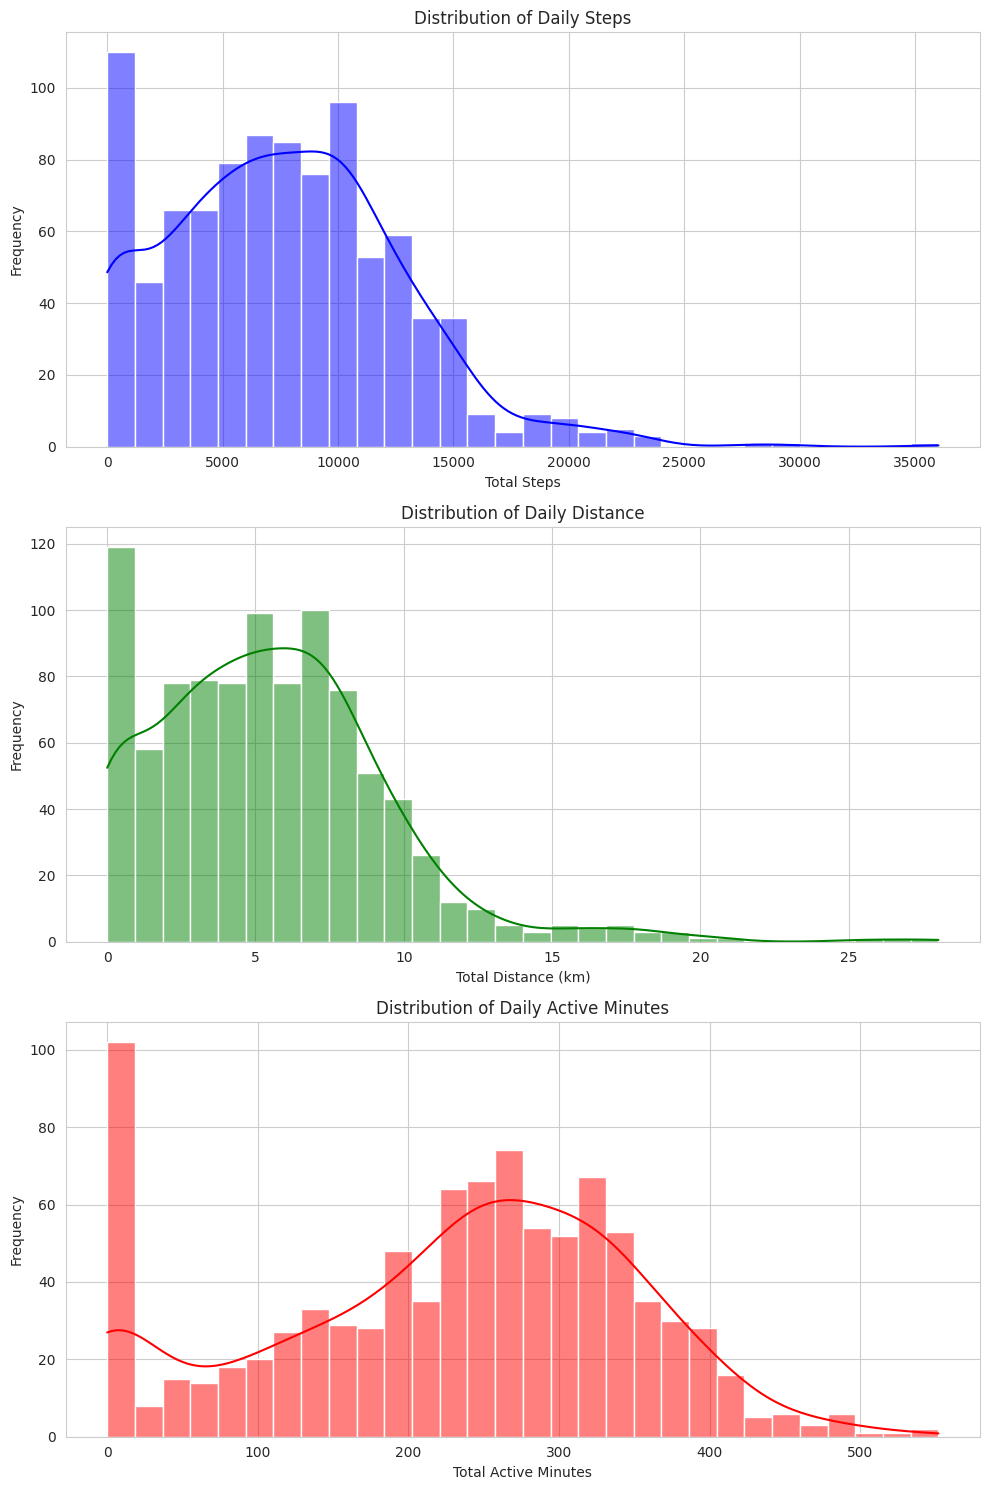

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for TotalSteps, TotalDistance, and TotalActiveMinutes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plotting TotalSteps
sns.histplot(data=activity_data, x='TotalSteps', bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Daily Steps')
axes[0].set_xlabel('Total Steps')
axes[0].set_ylabel('Frequency')

# Plotting TotalDistance
sns.histplot(data=activity_data, x='TotalDistance', bins=30, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Daily Distance')
axes[1].set_xlabel('Total Distance (km)')
axes[1].set_ylabel('Frequency')

# Plotting TotalActiveMinutes
sns.histplot(data=activity_data, x='TotalActiveMinutes', bins=30, ax=axes[2], kde=True, color='red')
axes[2].set_title('Distribution of Daily Active Minutes')
axes[2].set_xlabel('Total Active Minutes')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


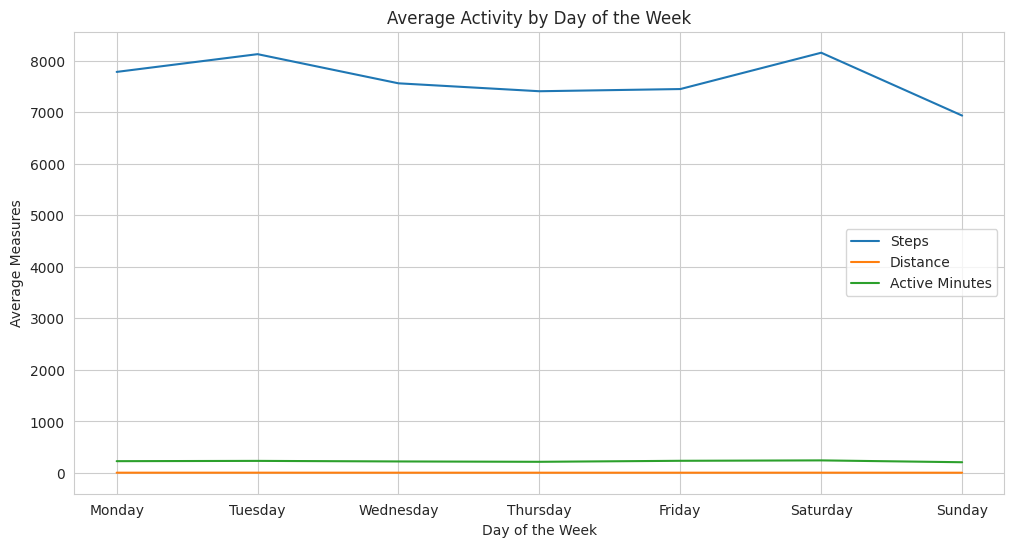

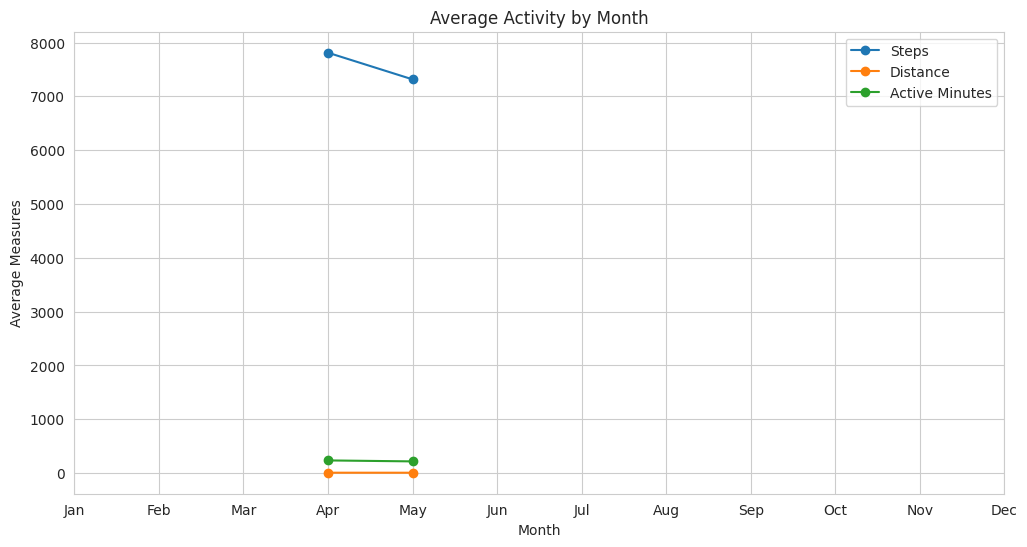

In [13]:
import numpy as np

# Ensure only numeric data is used for mean calculations
numeric_columns = activity_data.select_dtypes(include=[np.number])

# Extracting day of the week, month, and year from the Date for further analysis
activity_data['DayOfWeek'] = activity_data['Date'].dt.day_name()
activity_data['Month'] = activity_data['Date'].dt.month
activity_data['Year'] = activity_data['Date'].dt.year

# Grouping numeric data by DayOfWeek to see weekly trends
weekly_activity = numeric_columns.groupby(activity_data['DayOfWeek']).mean()

# Reordering the days for proper plotting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_activity = weekly_activity.reindex(order)

# Plotting weekly trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_activity['TotalSteps'], label='Steps')
plt.plot(weekly_activity['TotalDistance'], label='Distance')
plt.plot(weekly_activity['TotalActiveMinutes'], label='Active Minutes')
plt.title('Average Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Measures')
plt.legend()
plt.grid(True)
plt.show()

# Grouping numeric data by Month to see monthly trends
monthly_activity = numeric_columns.groupby(activity_data['Month']).mean()

# Plotting monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_activity['TotalSteps'], label='Steps', marker='o')
plt.plot(monthly_activity['TotalDistance'], label='Distance', marker='o')
plt.plot(monthly_activity['TotalActiveMinutes'], label='Active Minutes', marker='o')
plt.title('Average Activity by Month')
plt.xlabel('Month')
plt.ylabel('Average Measures')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


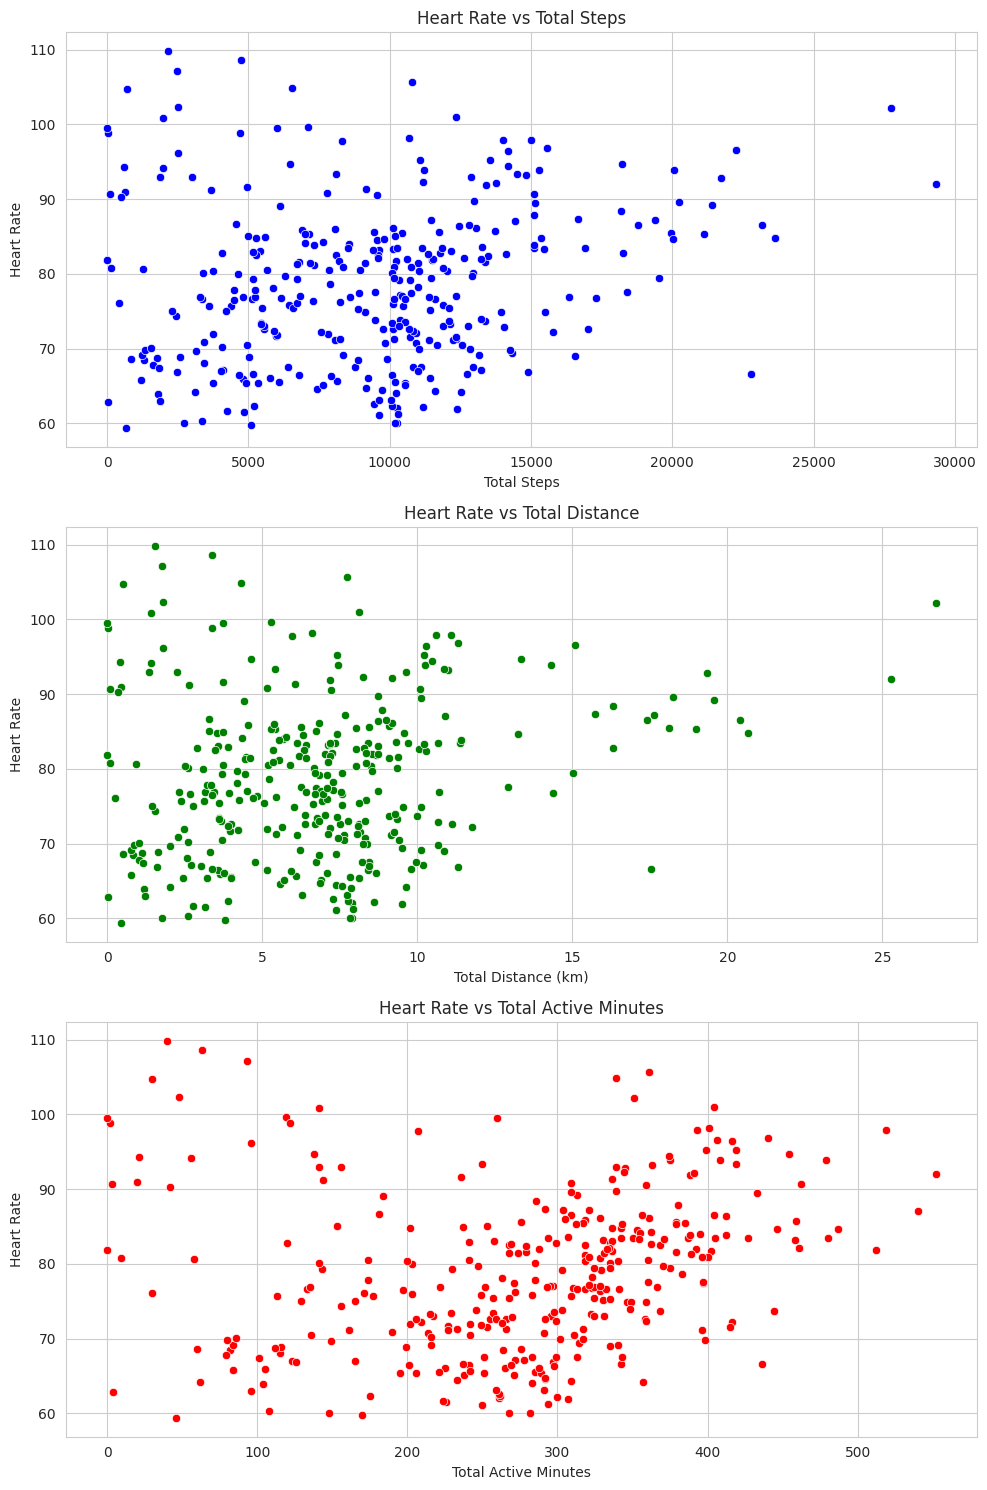

In [15]:
# Selecting numeric columns for correlation analysis
numeric_columns_hr = activity_data_heartrate.select_dtypes(include=[np.number])

# Plotting scatter plots to visualize relationships
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.scatterplot(data=activity_data_heartrate, x='TotalSteps', y='Heart_rate', ax=axes[0], color='blue')
axes[0].set_title('Heart Rate vs Total Steps')
axes[0].set_xlabel('Total Steps')
axes[0].set_ylabel('Heart Rate')

sns.scatterplot(data=activity_data_heartrate, x='TotalDistance', y='Heart_rate', ax=axes[1], color='green')
axes[1].set_title('Heart Rate vs Total Distance')
axes[1].set_xlabel('Total Distance (km)')
axes[1].set_ylabel('Heart Rate')

sns.scatterplot(data=activity_data_heartrate, x='TotalActiveMinutes', y='Heart_rate', ax=axes[2], color='red')
axes[2].set_title('Heart Rate vs Total Active Minutes')
axes[2].set_xlabel('Total Active Minutes')
axes[2].set_ylabel('Heart Rate')

plt.tight_layout()
plt.show()

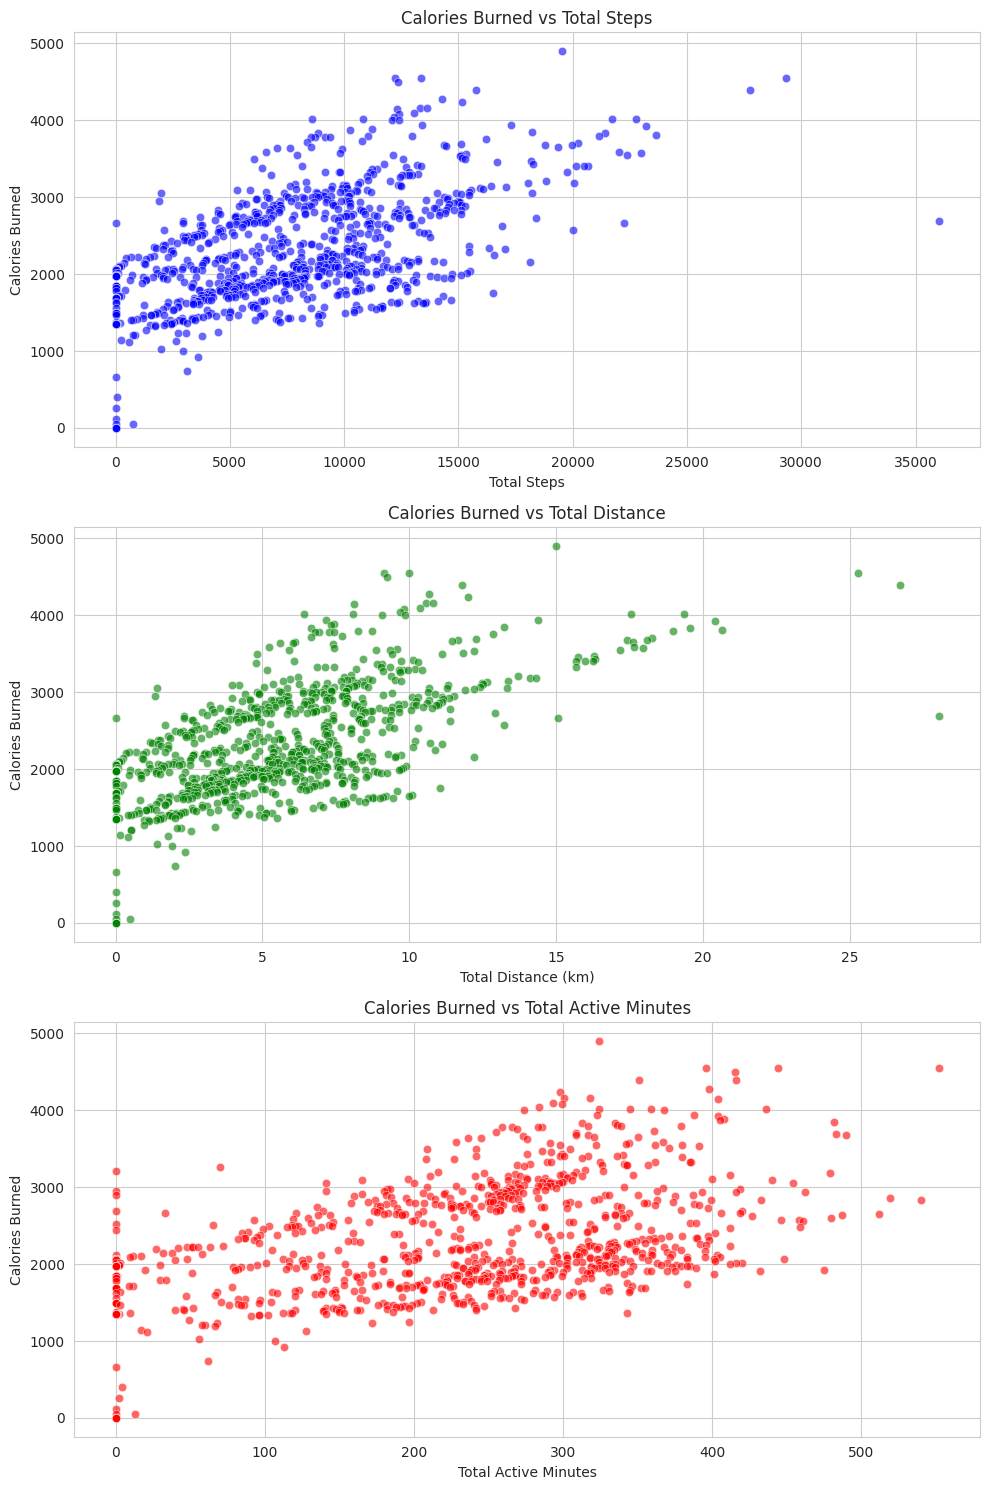

In [16]:
# Analyzing the relationship between activity levels and calories burned

# Selecting numeric columns for correlation analysis
numeric_columns_activity = activity_data.select_dtypes(include=[np.number])

# Plotting scatter plots to visualize the relationships
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.scatterplot(data=activity_data, x='TotalSteps', y='Calories', ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Calories Burned vs Total Steps')
axes[0].set_xlabel('Total Steps')
axes[0].set_ylabel('Calories Burned')

sns.scatterplot(data=activity_data, x='TotalDistance', y='Calories', ax=axes[1], color='green', alpha=0.6)
axes[1].set_title('Calories Burned vs Total Distance')
axes[1].set_xlabel('Total Distance (km)')
axes[1].set_ylabel('Calories Burned')

sns.scatterplot(data=activity_data, x='TotalActiveMinutes', y='Calories', ax=axes[2], color='red', alpha=0.6)
axes[2].set_title('Calories Burned vs Total Active Minutes')
axes[2].set_xlabel('Total Active Minutes')
axes[2].set_ylabel('Calories Burned')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


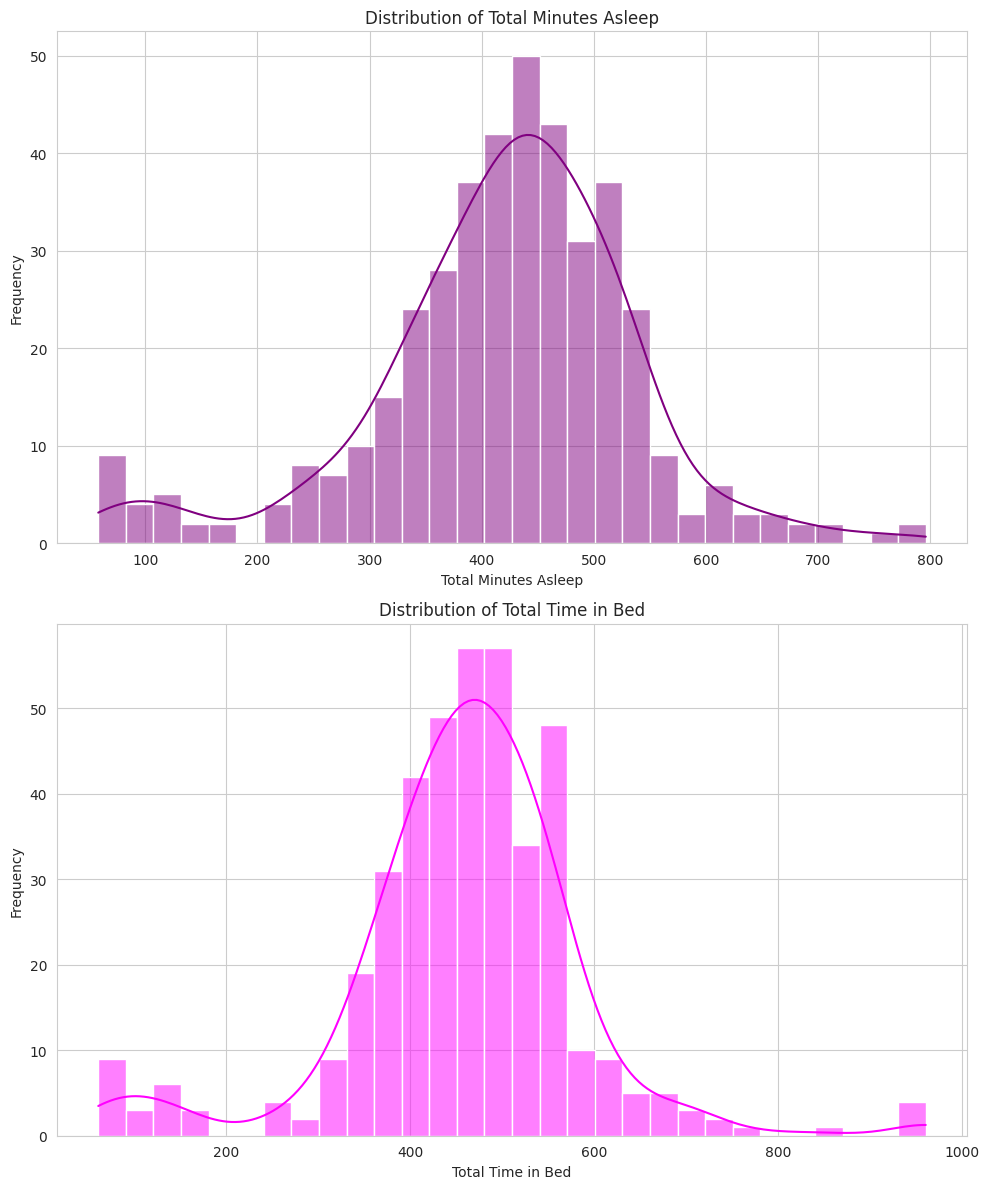

In [17]:
# Plotting histograms for Total Sleep Time and Time in Bed
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Histogram for Total Sleep Time
sns.histplot(data=sleep_data, x='TotalMinutesAsleep', bins=30, ax=axes[0], kde=True, color='purple')
axes[0].set_title('Distribution of Total Minutes Asleep')
axes[0].set_xlabel('Total Minutes Asleep')
axes[0].set_ylabel('Frequency')

# Histogram for Time in Bed
sns.histplot(data=sleep_data, x='TotalTimeInBed', bins=30, ax=axes[1], kde=True, color='magenta')
axes[1].set_title('Distribution of Total Time in Bed')
axes[1].set_xlabel('Total Time in Bed')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


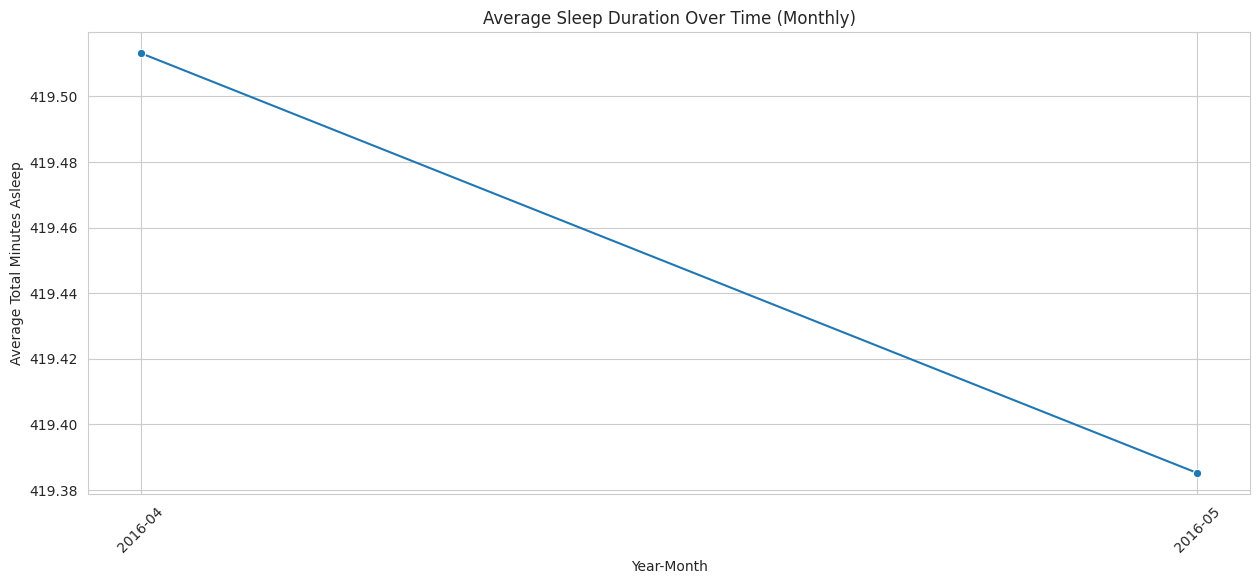

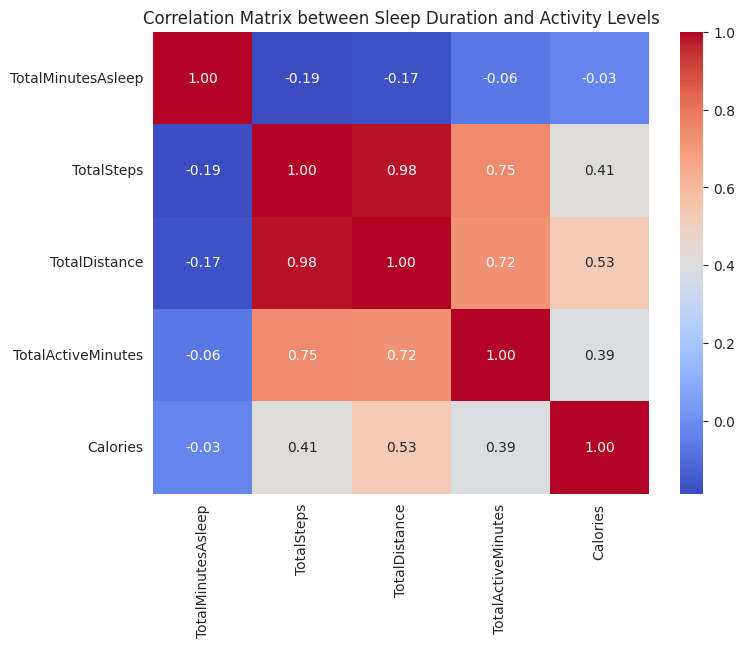

In [18]:
# Analyze trends in sleep duration over time
sleep_data['Year'] = sleep_data['Date'].dt.year
sleep_data['Month'] = sleep_data['Date'].dt.month
sleep_data['Day'] = sleep_data['Date'].dt.day

# Grouping by Year and Month to see monthly trends over the years
monthly_sleep = sleep_data.groupby(['Year', 'Month']).agg({'TotalMinutesAsleep': 'mean'}).reset_index()
monthly_sleep['YearMonth'] = monthly_sleep['Year'].astype(str) + '-' + monthly_sleep['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sleep, x='YearMonth', y='TotalMinutesAsleep', marker='o')
plt.xticks(rotation=45)
plt.title('Average Sleep Duration Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Total Minutes Asleep')
plt.grid(True)
plt.show()

# Analyze the relationship between sleep duration and activity levels
# Merging activity data with sleep data on 'Id' and 'Date'
activity_sleep_merged = pd.merge(activity_data, sleep_data, on=['Id', 'Date'])

# Correlation analysis between TotalMinutesAsleep and activity variables
activity_columns = ['TotalSteps', 'TotalDistance', 'TotalActiveMinutes', 'Calories']
sleep_activity_corr = activity_sleep_merged[['TotalMinutesAsleep'] + activity_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sleep_activity_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Sleep Duration and Activity Levels')
plt.show()
